# K-means algorithm for clustering and PCA algorithm for data dimensionality reduction

### Import of necessary packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Data loading

In [2]:
# Download the CSV file and read it without specifying the names of the columns
data_2d_df = pd.read_csv('data_hw_6/data_2d.csv', header=None)

# Generate a list of column names based on the number of columns in the DataFrame
column_names_1 = [f'column_{i+1}' for i in range(len(data_2d_df.columns))]

# Set the names of the columns in the DataFrame
data_2d_df.columns = column_names_1

# Display the DataFrame
data_2d_df.head(5)

,column_1,column_2,column_3
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


In [3]:
data_2d_df.describe()

,column_1,column_2,column_3
count,200.000000,200.000000,200.000000
mean,0.500000,1.758886,2.211502
std,0.501255,1.239986,1.605176
min,0.000000,-1.488928,-1.344141
25%,0.000000,0.874456,0.955211
50%,0.500000,1.729753,2.282891
75%,1.000000,2.701499,3.602253
max,1.000000,4.554605,5.722027


In [4]:
# Download the CSV file and read it without specifying the names of the columns
mnist_df = pd.read_csv('data_hw_6/mnist.csv', header=None)

# Generate a list of column names based on the number of columns in the DataFrame
column_names_2 = [f'column_{i+1}' for i in range(len(mnist_df.columns))]

# Set the names of the columns in the DataFrame
mnist_df.columns = column_names_2

# Display the DataFrame
mnist_df.head(5)

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,...,column_776,column_777,column_778,column_779,column_780,column_781,column_782,column_783,column_784,column_785
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist_df.describe()

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,...,column_776,column_777,column_778,column_779,column_780,column_781,column_782,column_783,column_784,column_785
count,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,4.378000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.506000,0.256000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.873958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.314504,5.724334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### K-means algorithm and elbow method for data_2d_df DataFrame

C:\Users\user\miniconda3\envs\GoIT_Data_Science\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\miniconda3\envs\GoIT_Data_Science\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\miniconda3\envs\GoIT_Data_Science\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\miniconda3\envs\GoIT_Data_Science\lib\site-packages\s

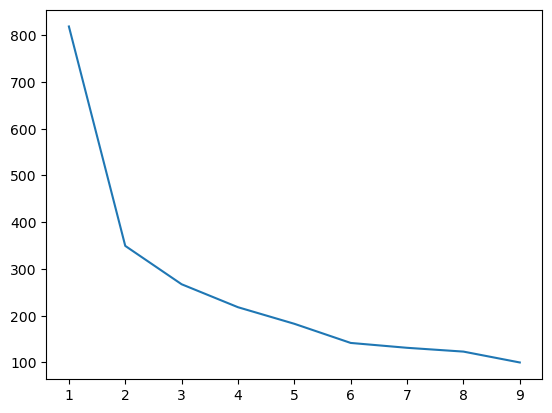

In [7]:
X1 = data_2d_df[['column_2', 'column_3']].to_numpy()

# Elbow method
inertia_values = []
for i in range(1, 10):
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=1, max_iter=4, 
        tol=1e-04, random_state=2
    )
    y_km = kmeans.fit_predict(X1)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia_values)

#### As we can notice from the diagram above, the best value for the number of clusters for dataset data_2D using the elbow method is 2

C:\Users\user\miniconda3\envs\GoIT_Data_Science\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\miniconda3\envs\GoIT_Data_Science\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


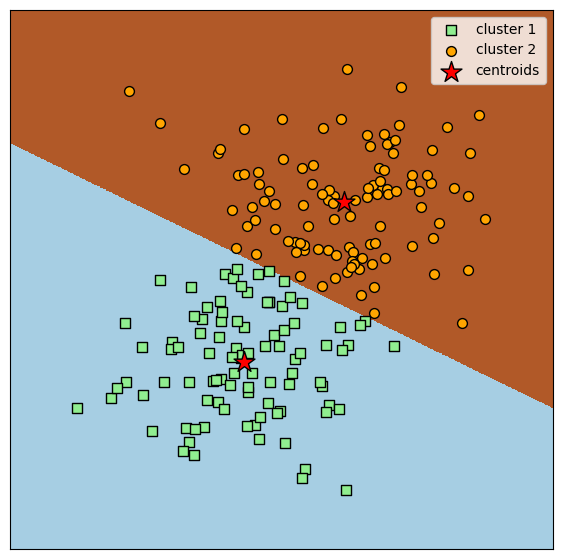

In [8]:
np.random.seed(42)

kmeans = KMeans(
    n_clusters=2, init='random',
    n_init=1, max_iter=8, 
    tol=1e-04, random_state=2
)
kmeans.fit(X1)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
y_km = kmeans.fit_predict(X1)

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')


# plot the 2 clusters
plt.scatter(
    X1[y_km == 0, 0], X1[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X1[y_km == 1, 0], X1[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()

### The PCA algorithm for reducing the dimensionality of the DataFrame mnist_df to a 2-dimensional version

In [11]:
X2 = mnist_df.to_numpy()

# Normalizing the features
X2_norm = StandardScaler().fit_transform(X2)
X2_norm

array([[ 0.91324432,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.82825896,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.17655962,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.13165765,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.52486028,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56494367,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [14]:
# Initialization a PCA object
pca_mnist = PCA(n_components=2)

# Fitting the PCA model to the data and then applying the dimensionality reduction
principal_components_mnist = pca_mnist.fit_transform(X2_norm)

principal_components_mnist

array([[-4.52848433e+00,  4.19684045e+00],
       [ 5.02585692e+00, -1.24712693e+01],
       [-6.90751242e+00, -5.88964557e+00],
       [ 8.58416617e+00, -3.38376459e-01],
       [ 1.10586769e+00,  6.57726151e+00],
       [-7.56340700e+00, -5.60725839e+00],
       [-1.28191149e+00,  4.34568254e+00],
       [-3.56514337e+00,  5.07960870e+00],
       [ 3.74380498e+00,  8.11275379e-01],
       [-4.58902936e-01,  4.40524355e+00],
       [ 1.39234768e+01, -4.86740911e+00],
       [ 7.48384286e+00, -2.23235205e+00],
       [-4.69916806e+00,  6.85787689e+00],
       [ 9.11086021e+00,  1.90439523e+00],
       [-8.13251601e+00, -6.98243290e+00],
       [ 4.87242110e+00, -4.44798440e+00],
       [-8.15906771e-01,  9.12672807e+00],
       [-2.14235620e+00,  6.34553842e+00],
       [ 8.88221222e+00, -1.71443949e-01],
       [-3.39905687e+00,  5.31679344e+00],
       [-4.87598685e+00,  1.55845513e+00],
       [ 3.68412552e-01, -1.20008834e+00],
       [ 1.60991984e+00,  9.68798146e-01],
       [-2.

In [17]:
principal_df = pd.DataFrame(data = principal_components_mnist, columns = ['principal component 1', 'principal component 2'])
principal_df

,principal component 1,principal component 2
0,-4.528484,4.196840
1,5.025857,-12.471269
2,-6.907512,-5.889646
3,8.584166,-0.338376
4,1.105868,6.577262
...,...,...
495,8.575627,-1.872660
496,-3.367134,7.349388
497,-6.207955,0.236035
498,0.380117,-0.372757


In [19]:
# Explained variance of the two principal components
pca_mnist.explained_variance_ 

array([42.1128794 , 29.43881725])

In [20]:
print('Explained variation per principal component: {}'.format(pca_mnist.explained_variance_ratio_))

Explained variation per principal component: [0.07296641 0.05100684]


### K-means algorithm and elbow method for mnist_df DataFrame

C:\Users\user\miniconda3\envs\GoIT_Data_Science\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\miniconda3\envs\GoIT_Data_Science\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\miniconda3\envs\GoIT_Data_Science\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\miniconda3\envs\GoIT_Data_Science\lib\site-packages\s

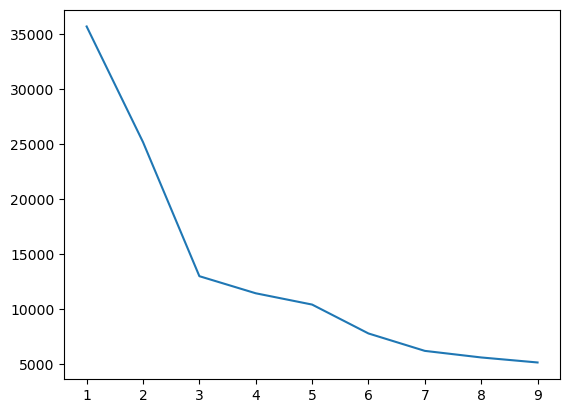

In [21]:
X2_PCA = principal_df.to_numpy()

# Elbow method
inertia_values = []
for i in range(1, 10):
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=1, max_iter=4, 
        tol=1e-04, random_state=2
    )
    y_km = kmeans.fit_predict(X2_PCA)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia_values)

#### As we can notice from the diagram above, the best value for the number of clusters for dataset mnist using the elbow method is 3

C:\Users\user\miniconda3\envs\GoIT_Data_Science\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\miniconda3\envs\GoIT_Data_Science\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


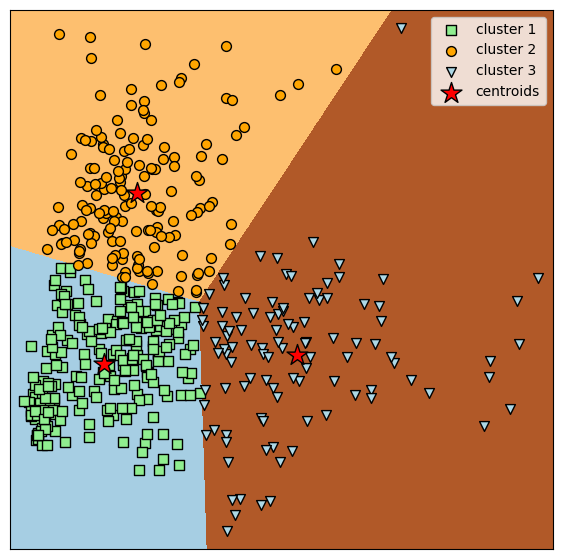

In [23]:
np.random.seed(42)

kmeans = KMeans(
    n_clusters=3, init='random',
    n_init=1, max_iter=8, 
    tol=1e-04, random_state=2
)
kmeans.fit(X2_PCA)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X2_PCA[:, 0].min() - 1, X2_PCA[:, 0].max() + 1
y_min, y_max = X2_PCA[:, 1].min() - 1, X2_PCA[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
y_km = kmeans.fit_predict(X2_PCA)

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')


# plot the 3 clusters
plt.scatter(
    X2_PCA[y_km == 0, 0], X2_PCA[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X2_PCA[y_km == 1, 0], X2_PCA[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X2_PCA[y_km == 2, 0], X2_PCA[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()